In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [20]:
pseq.io.download_example_data()

data = pseq.io.load_example()

# pretend we're working with two different samples
n = data.shape[0]//2
data = pseq.concat(data[:n], data[n:])

data

Nep3  tRNA:Pro-CGG-1-1  CG9570  Or19b  CG15322  Or19a  karr  \
sample cell                                                                
0      0        0                 0       0      0        0      0     0   
       1        1                 0       0      0        0      0     0   
       2        0                 0       0      0        0      0     0   
       3        0                 0       0      0        0      0     0   
       4        0                 0       0      0        0      0     0   
       5        0                 0       0      0        0      0     0   
       6        0                 0       0      0        0      0     0   
       7        0                 0       0      0        0      0     0   
       8        0                 0       0      0        0      0     0   
       9        0                 0       0      0        0      0     0   
       10       0                 0       0      0        0      0     0   
       11       0                 0       0      0        0      0     0   
       12       0                 0       0      0        0      0     0   
       13       0                 0       0      0        0      0     0   
       14       0                 0       0      0        0      0     0   
       15       0                 0       0      0        0      0     0   
       16       0                 0       0      0        0      0     0   
       17       0                 0       0      0        0      0     0   
       18       0                 0       0      0        0      0     0   
       19       0                 0       0      0        0      0     0   
       20       0                 0       0      0        0      0     0   
       21       0                 0       0      0        0      0     0   
       22       0                 0       0      0        0      0     0   
       23       0                 0       0      0        0      0     0   
       24       0                 0       0      0        0      0     0   
       25       0                 0       0      0        0      0     0   
       26       0                 0       0      0        0      0     0   
       27       0                 0       0      0        0      0     0   
       28       0                 0       0      0        0      0     0   
       29       0                 0       0      0        0      0     0   
...           ...               ...     ...    ...      ...    ...   ...   
1      876      1                 0       0      0        0      0     0   
       877      0                 0       0      0        0      0     0   
       878      0                 0       0      0        0      0     0   
       879      1                 0       0      0        0      0     0   
       880      0                 0       0      0        0      0     0   
       881      0                 0       0      0        0      0     0   
       882      0                 0       0      0        0      0     0   
       883      0                 0       0      0        0      0     0   
       884      0                 0       0      0        0      0     0   
       885      0                 0       0      0        0      0     0   
       886      0                 0       0      0        0      0     0   
       887      0                 0       0      0        0      0     0   
       888      0                 0       0      0        0      0     0   
       889      0                 0       0      0        0      0     0   
       890      0                 0       0      0        0      0     0   
       891      0                 0       0      0        0      0     0   
       892      0                 0       0      0        0      0     0   
       893      0                 0       0      0        0      0     0   
       894      0                 0       0      0        0      0     0   
       895      0                 0       0      0        0  

In [3]:
dropped = data.drop_cells(umis=1).drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(906, 17492)
(906, 9130)


,min,max,mean,median
umis,0,1053,0,0
umis above 0,1,1053,2,1
umis per cell cell,743,11228,1486,1164
genes expressed,362,2818,742,662
umis per gene,1,77103,147,28
cells expressing,0,906,23,1


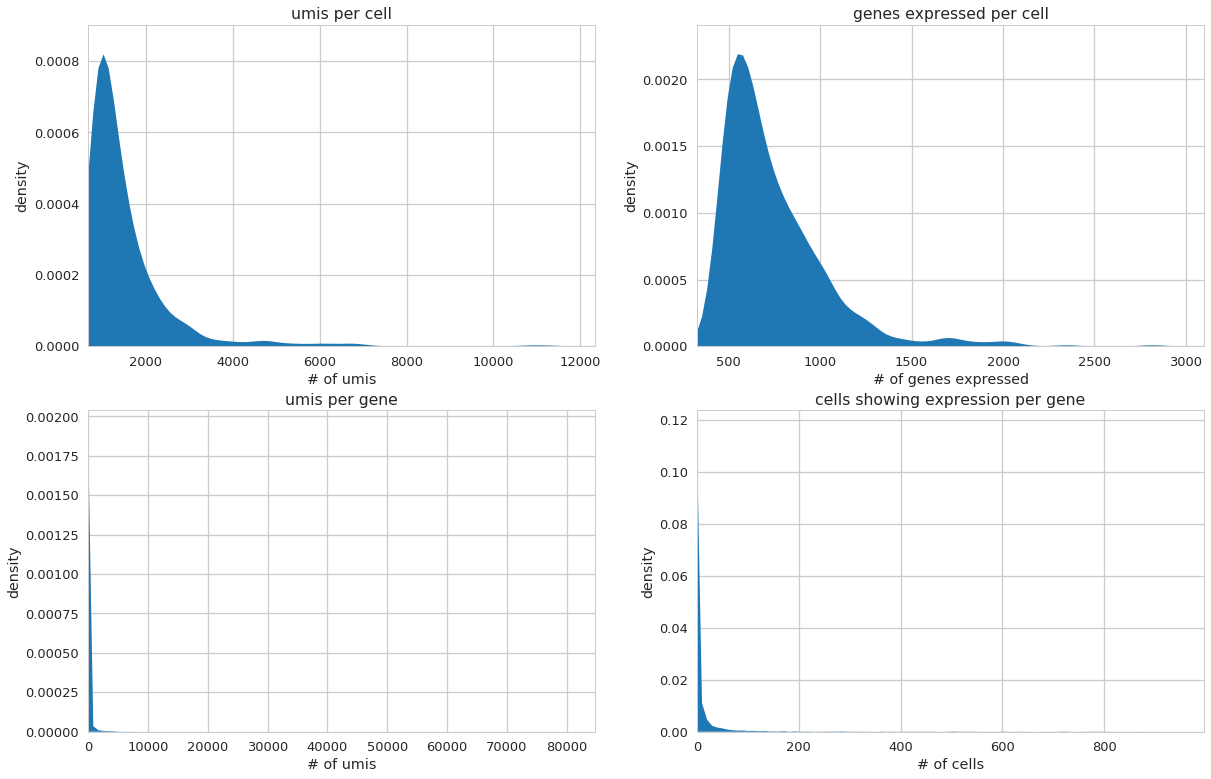

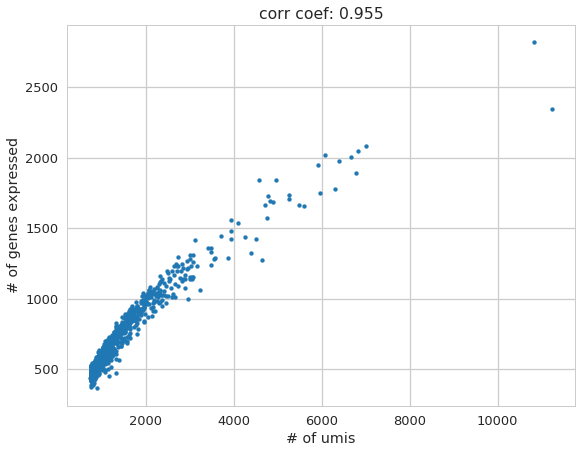

In [4]:
stats = pseq.summary.summarize(dropped)
stats

In [5]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total[:, np.newaxis])
regressed.head()

Nep3   CG33217     Vps11     RpL10       G9a       cin  \
sample cell                                                               
0      0    -0.550409 -0.805103 -0.772099 -0.260244 -0.975793 -0.413805   
       1     4.097735  2.769397 -0.339962 -0.321946 -0.494048 -0.200104   
       2    -0.134333 -0.174923 -0.123434  0.081624 -0.252664 -0.093026   
       3    -0.143933 -0.189462 -0.138400  1.026878 -0.269348 -0.100427   
       4    -0.200246  2.879925 -0.226192  0.189724 -0.367218 -0.143842   

                    y        sc    l(1)sc       ase    ...       CG5118  \
sample cell                                            ...                
0      0    -0.511423  0.049744 -0.097752 -0.275277    ...    -0.192668   
       1    -0.193864 -0.022132 -0.062985 -0.145458    ...    -0.121801   
       2    -0.034747 -0.058147 -0.045565 -0.080411    ...    -0.086293   
       3    -0.045744 -0.055657 -0.046769 -0.084907    ...     9.041346   
       4    -0.110259 -0.041055 -0.053832 -0.111281    ...    -0.103144   

                 Plap    CG5080      Tfb4      Pino    CG4629         S  \
sample cell                                                               
0      0    -0.776220 -0.533113 -0.297524 -0.550203 -0.586450 -1.213666   
       1    -0.280349 -0.236816 -0.131499 -0.232080 -0.288634 -0.537623   
       2    -0.031887 -0.088352 -0.048311  4.960913 -0.139410  2.323554   
       3    -0.049060 -0.098613 -0.054060 -0.083698 -0.149724  2.300141   
       4    -0.149800 -0.158809 -0.087790 -0.148328 -0.210227 -0.359639   

                 EGFP  tdTomato      GAL4  
sample cell                                
0      0    -0.435544 -0.570921 -0.078332  
       1     5.748263 -0.231110 -0.110789  
       2    -0.087804 -0.060843 -0.127052  
       3    -0.095827 -0.072611 -0.125928  
       4    -0.142891 -0.141647 -0.119334  

[5 rows x 9130 columns]

pc-0       pc-1      pc-2      pc-3      pc-4      pc-5  \
sample cell                                                                 
0      0     10.759341  36.023065  6.806370 -3.365493  0.168374  0.909364   
       1     -8.387182  -2.045313 -3.024775  1.873986 -2.376047  0.959078   
       2     11.271399  -5.363713  2.145454  3.421776 -1.062474  0.223716   
       3      5.577005   4.166702  2.423080  0.021207  0.229589 -1.090887   
       4     -1.151384   1.434671  4.277801 -4.605186  4.694904 -1.369935   

                 pc-6      pc-7       pc-8      pc-9     pc-10     pc-11  \
sample cell                                                                
0      0    -5.099287  8.950067  18.643288  7.977740  9.625995  1.444753   
       1    -2.183072  0.136391  -2.604294 -0.307371 -7.259884 -1.122497   
       2     2.292320  0.448712  -0.179425  0.611136  4.401240 -0.264146   
       3     0.269033  1.124113  -0.289047 -0.038308 -0.066664 -0.787983   
       4     0.732650  3.124217  -0.249238  0.531160 -0.328050 -2.745555   

                 pc-12     pc-13      pc-14  
sample cell                                  
0      0     57.107532  5.254824 -21.233768  
       1     -1.935003 -0.654377  -0.763942  
       2      1.484913  2.171634   3.023894  
       3      1.512400  1.192202  -0.081434  
       4     -0.964223 -0.585820  -2.539093

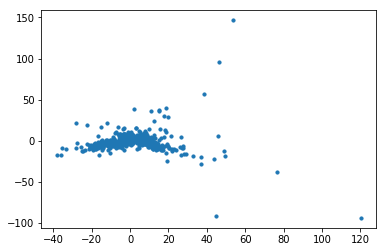

In [6]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [7]:
clustered = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: {}".format(np.unique(clustered.index.labels[2]).shape[0]))
clustered.head()

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11063885688781738 seconds
Jaccard graph constructed in 0.8666880130767822 seconds
Wrote graph to binary file in 0.19068312644958496 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.623959
Louvain completed 21 runs in 0.6114277839660645 seconds
PhenoGraph complete in 1.8330450057983398 seconds
# of clusters: 5


pc-0       pc-1      pc-2      pc-3      pc-4  \
sample cell cluster                                                       
0      0    4        10.759341  36.023065  6.806370 -3.365493  0.168374   
       1    0        -8.387182  -2.045313 -3.024775  1.873986 -2.376047   
       2    3        11.271399  -5.363713  2.145454  3.421776 -1.062474   
       3    4         5.577005   4.166702  2.423080  0.021207  0.229589   
       4    1        -1.151384   1.434671  4.277801 -4.605186  4.694904   

                         pc-5      pc-6      pc-7       pc-8      pc-9  \
sample cell cluster                                                      
0      0    4        0.909364 -5.099287  8.950067  18.643288  7.977740   
       1    0        0.959078 -2.183072  0.136391  -2.604294 -0.307371   
       2    3        0.223716  2.292320  0.448712  -0.179425  0.611136   
       3    4       -1.090887  0.269033  1.124113  -0.289047 -0.038308   
       4    1       -1.369935  0.732650  3.124217  -0.249238  0.531160   

                        pc-10     pc-11      pc-12     pc-13      pc-14  
sample cell cluster                                                      
0      0    4        9.625995  1.444753  57.107532  5.254824 -21.233768  
       1    0       -7.259884 -1.122497  -1.935003 -0.654377  -0.763942  
       2    3        4.401240 -0.264146   1.484913  2.171634   3.023894  
       3    4       -0.066664 -0.787983   1.512400  1.192202  -0.081434  
       4    1       -0.328050 -2.745555  -0.964223 -0.585820  -2.539093

In [9]:
tsne = pseq.dim.tsne(reduced, perplexity=10.0, verbose=True)
tsne.head()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 906 samples in 0.001s...
[t-SNE] Computed neighbors for 906 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 906 / 906
[t-SNE] Mean sigma: 1.816103
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.523453
[t-SNE] Error after 1000 iterations: 1.196191


tsne-0     tsne-1
sample cell cluster                      
0      0    4       -52.415714  -5.044813
       1    0        49.597916   1.022710
       2    3        -1.920333 -48.037582
       3    4       -25.047232 -12.358072
       4    1        -7.751913  32.942566

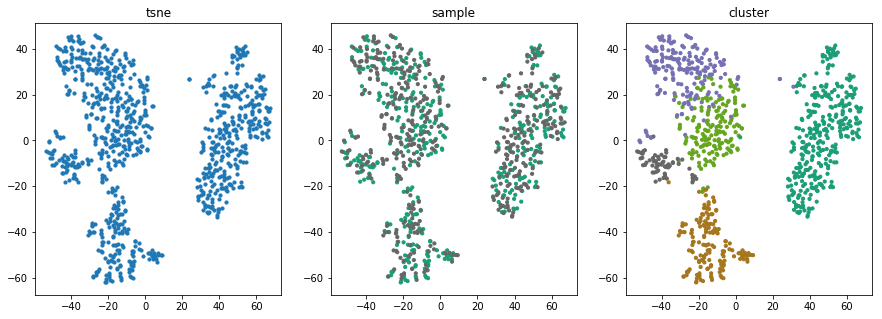

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pseq.viz.scatter(tsne, s=10, cmap="Dark2")
plt.title('tsne')

plt.subplot(1, 3, 2)
pseq.viz.scatter(tsne, color_by="sample", s=10, cmap="Dark2")
plt.title('sample')

plt.subplot(1, 3, 3)
pseq.viz.scatter(tsne, color_by="cluster", s=10, cmap="Dark2")
plt.title('cluster')

plt.show()

In [9]:
top_genes = pseq.upregulated(normed, clusters, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]

---

['futsch', '14-3-3zeta', 'Cam']
['Hsp23', 'sbb', 'wde']
['pros', 'jim', 'RpS29']
['fabp', 'Obp44a', 'CAH1']
['CR43283', 'CG3800', 'Pen']


/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


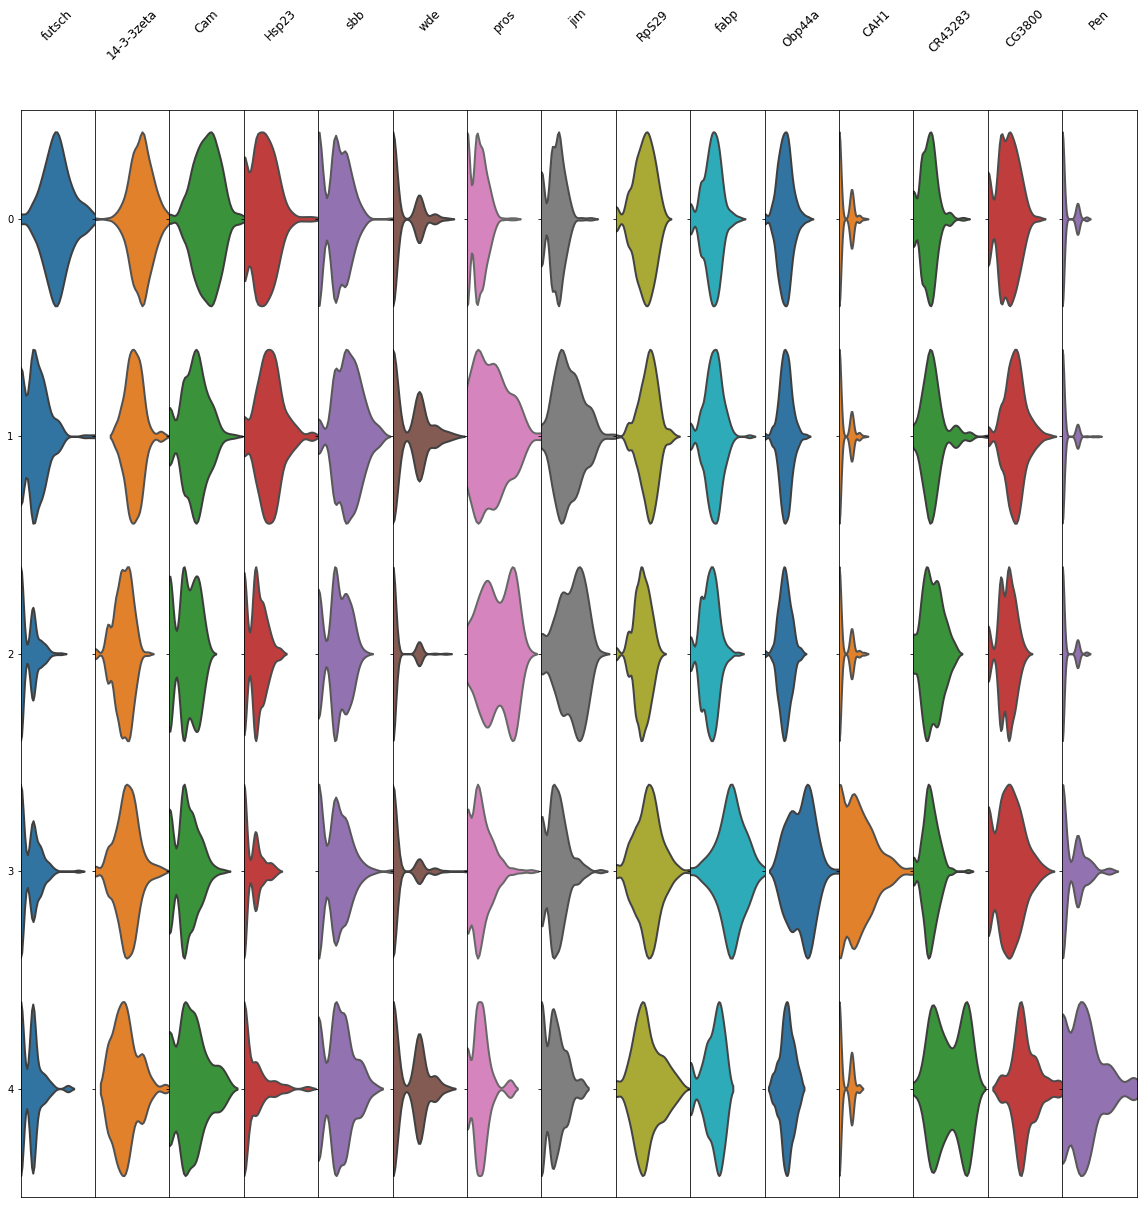

In [10]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, groups=clusters, cluster_genes=False)